In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
 
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
df= pd.read_csv("events.csv")
df.head()

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.7731,Turn,1.0
1,009ee11563,11.38470,41.1847,Turn,1.0
2,009ee11563,54.66470,58.7847,Turn,1.0
3,011322847a,28.09660,30.2966,Turn,1.0
4,01d0fe7266,30.31840,31.8784,Turn,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3712 entries, 0 to 3711
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          3712 non-null   object 
 1   Init        3712 non-null   float64
 2   Completion  3712 non-null   float64
 3   Type        2669 non-null   object 
 4   Kinetic     2669 non-null   float64
dtypes: float64(3), object(2)
memory usage: 145.1+ KB


In [4]:
df.shape

(3712, 5)

In [5]:
df.describe()

,Init,Completion,Kinetic
count,3712.000000,3712.000000,2669.000000
mean,988.178769,995.975486,0.811915
std,946.081452,943.655075,0.390854
min,1.020000,2.513120,0.000000
25%,45.018600,55.685525,1.000000
50%,849.584500,852.576000,1.000000
75%,1608.286250,1611.910000,1.000000
max,4425.577000,4437.105000,1.000000


In [7]:
df.isnull().sum()

Id               0
Init             0
Completion       0
Type          1043
Kinetic       1043
dtype: int64

<Axes: xlabel='Type', ylabel='count'>

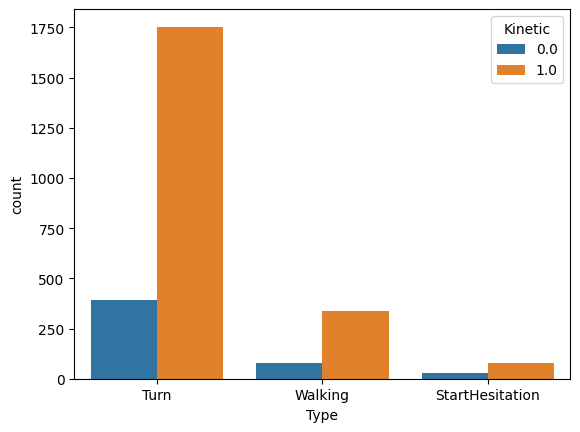

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df ,x='Type', hue='Kinetic')

<Axes: xlabel='Id', ylabel='Type'>

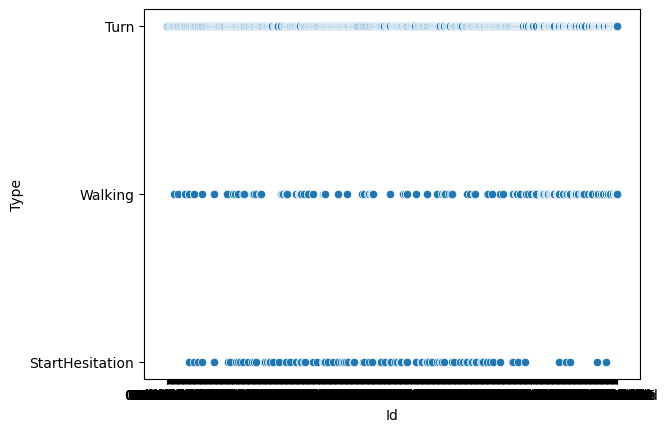

In [9]:
sns.scatterplot(data=df,x='Id',y='Type')

<ipython-input-10-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

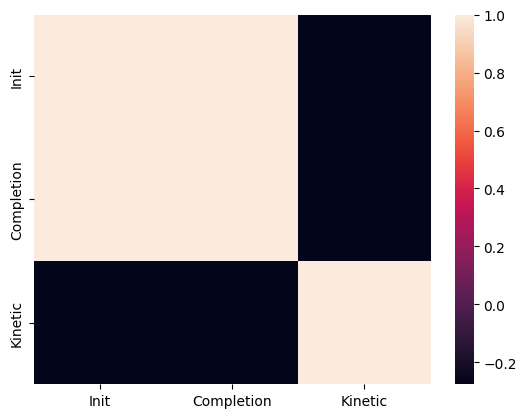

In [10]:
sns.heatmap(df.corr())

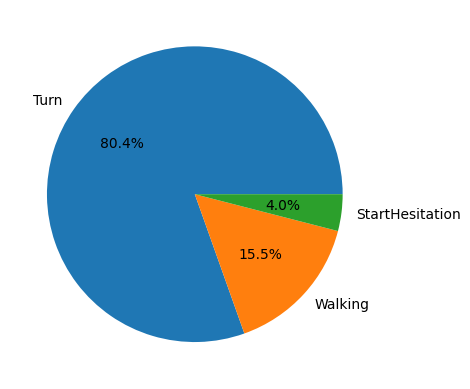

In [14]:
x = df['Type'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

In [11]:
feature_columns = [val for val in df.columns if val not in ['Id', 'Type']]

features = df.loc[:,feature_columns].values
labels = df.loc[:, 'Type']

In [12]:
features

array([[8.613120e+00, 1.477310e+01, 1.000000e+00],
       [1.138470e+01, 4.118470e+01, 1.000000e+00],
       [5.466470e+01, 5.878470e+01, 1.000000e+00],
       ...,
       [9.319390e+02, 9.334470e+02, 1.000000e+00],
       [9.908590e+02, 9.918580e+02, 0.000000e+00],
       [1.180467e+03, 1.181258e+03, 1.000000e+00]])

In [13]:
labels

0          Turn
1          Turn
2          Turn
3          Turn
4          Turn
         ...   
3707    Walking
3708    Walking
3709       Turn
3710       Turn
3711       Turn
Name: Type, Length: 3712, dtype: object

In [ ]:
labl_freq = {}
for val in list(set(labels)):
    labl_freq[val] = 0
    for label in labels:
        if label == val:
            labl_freq[val] += 1
  
labl_freq

{'Turn': 2147, nan: 0, 'Walking': 415, 'StartHesitation': 107}

In [ ]:
scaler =MinMaxScaler((-1, 1))
x = scaler.fit_transform(features)
y = labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
model = XGBClassifier()
model.fit (x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
print('The accuracy:',model.score(x_train,y_train))

The accuracy: 0.9611239414934565


In [ ]:
import tracemalloc
import pandas as pd
import dask.dataframe as dd
import time
def tracing_start():
    tracemalloc.stop()
    print("nTracing Status : ", tracemalloc.is_tracing())
    tracemalloc.start()
    print("Tracing Status : ", tracemalloc.is_tracing())
def tracing_mem():
    first_size, first_peak = tracemalloc.get_traced_memory()
    peak = first_peak/(1024*1024)
    print("Peak Size in MB - ", peak)
tracing_start()
start = time.time()
sq_list1 = [elem + elem**2 for elem in range(1,1000)]
end = time.time()
print("time elapsed {} milli seconds".format((end-start)*1000))
tracing_mem()

nTracing Status :  False
Tracing Status :  True
time elapsed 36.40890121459961 milli seconds
Peak Size in MB -  0.047939300537109375
